In [1]:
import numpy as np
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from config import config

In [2]:
def read_mongo(collection, query={}):
    """ Read from Mongo and Store into DataFrame """

    # Make a query to the specific DB and Collection
    cursor = collection.find(query)
    
    elements = []
    for doc in cursor:
        del doc['_id']
        elements.append(doc)
        
    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(elements)
    
    return df

In [3]:
REPO = 'jabref/jabref'

In [4]:
mongoClient = pymongo.MongoClient(config['DATABASE']['CONNECTION_STRING'])
db = mongoClient[config['DATABASE']['NAME']]
collection = db[f'{REPO}_results']
df = read_mongo(collection, {})
df.head()

,data,repositorio,issue,arquivos,topk,tecnica,compare,filtros,arquivos_resolvidos_de_verdade,mapk,min_sim,max_sim,mediana_sim,acertos,erros,arquivos_sugeridos
0,2015-11-20T16:00:52Z,jabref/jabref,UTF-8 instead of UTF8 - 367,2,1,tfidf,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",[src/main/java/net/sf/jabref/importer/OpenData...,0.000000,0.0,0.000000,0.0,0,14,"[CHANGELOG, src/main/java/net/sf/jabref/JabRef..."
1,2015-12-15T10:39:22Z,jabref/jabref,Open pdf file when clicking pdf icon - 498,27,2,tfidf,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...","[CHANGELOG.md, src/main/java/net/sf/jabref/Jab...",0.009259,0.0,0.000000,0.0,1,15,[src/main/java/net/sf/jabref/importer/OpenData...
2,2016-01-04T10:14:13Z,jabref/jabref,Export - error stream closed - 608,2,3,tfidf,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...","[CHANGELOG.md, src/main/java/net/sf/jabref/exp...",0.166667,0.0,0.000000,0.0,1,41,"[CHANGELOG.md, src/main/java/net/sf/jabref/Jab..."
3,2016-01-19T10:35:24Z,jabref/jabref,Remove references to ResolvePDF in the default...,28,3,tfidf,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...","[CHANGELOG.md, src/main/java/net/sf/jabref/exp...",0.035714,0.0,0.000000,0.0,2,28,"[CHANGELOG.md, src/main/java/net/sf/jabref/exp..."
4,2016-01-31T16:35:28Z,jabref/jabref,Error on New Database - 751,1,3,tfidf,title,"{'lowercase': 1, 'removeLinks': 1, 'removeDigi...",[src/main/java/net/sf/jabref/specialfields/Spe...,0.000000,0.0,0.196083,0.0,0,54,"[CHANGELOG.md, src/main/java/net/sf/jabref/exp..."


In [5]:
tfidf = df[(df['tecnica'] == 'tfidf') & ((df['topk'] == 3) | (df['topk'] == 5))]
sbert = df[(df['tecnica'] == 'sbert') & ((df['topk'] == 3) | (df['topk'] == 5))]
word2vec = df[(df['tecnica'] == 'word2vec') & ((df['topk'] == 3) | (df['topk'] == 5))]

<AxesSubplot: xlabel='topk', ylabel='mapk'>

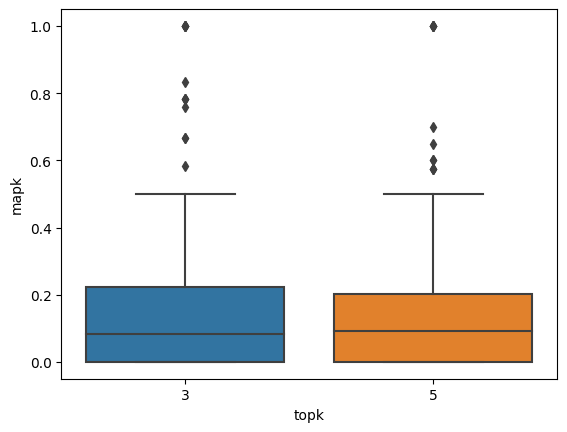

In [11]:
sns.boxplot(x=sbert["topk"], y=sbert["mapk"])

<AxesSubplot: xlabel='topk', ylabel='mapk'>

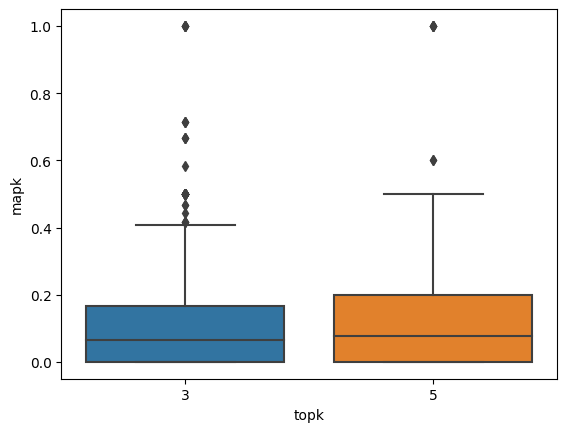

In [12]:
sns.boxplot(x=word2vec["topk"], y=word2vec["mapk"])

<AxesSubplot: xlabel='topk', ylabel='mapk'>

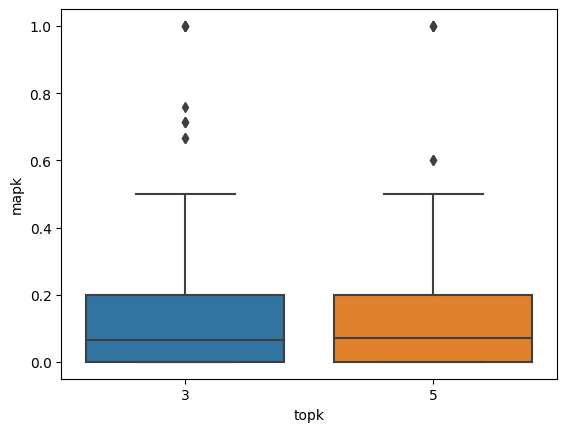

In [13]:
sns.boxplot(x=tfidf["topk"], y=tfidf["mapk"])

In [7]:
stats.kruskal(sbert[sbert['topk'] == 3]['mapk'], sbert[sbert['topk'] == 5]['mapk'])

KruskalResult(statistic=0.7278701663471531, pvalue=0.39357442278250576)

In [8]:
stats.kruskal(word2vec[word2vec['topk'] == 3]['mapk'], word2vec[word2vec['topk'] == 5]['mapk'])

KruskalResult(statistic=0.46886606589016544, pvalue=0.4935092942613706)

In [10]:
stats.kruskal(tfidf[tfidf['topk'] == 3]['mapk'], tfidf[tfidf['topk'] == 5]['mapk'])

KruskalResult(statistic=0.0835390850328004, pvalue=0.77255743504487)